# CREDIT CARD FRAUD DETECTION

This notebook contains Python programming to create a machine learning model to predict the fraudulent transaction using attributes from the creditcard dataset.

For that,We're going to approach in the following manner:
1. Problem definition
2. Data
3. Features
4. Modeling
5. Saving and loading trained machine learning models

## 1. Problem Definition

> Given attributes about a credit card transactions, can we identify whether or not they are fraudulent transactions?

## 2. Data

The original data available on Kaggle. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## 3. Features

**Create data dictionary**

1. Time - Time elapsed in seconds from the first transaction
2. V1 to V28 - Anonymized feature to protect sensitive information and maintain privacy
3. Amount - Monetary value of transaction
4. Class - Whether a transaction in fraudulent or legitimate
    * 0 - Legitimate
    * 1 - Fraudulent

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("creditcard.csv")
df.shape #(Rows,Columns)

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#Let"s find out how many of duplicates are there
df.duplicated().any()

True

In [6]:
df = df.drop_duplicates()
len(df)

283726

In [7]:
df.shape

(283726, 31)

In [8]:
#Let"s find out how many of each class there
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

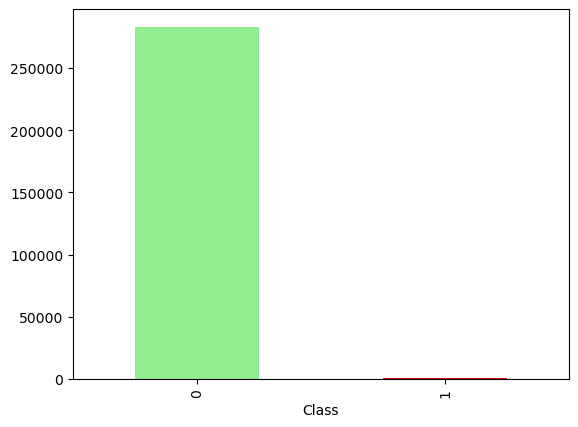

In [9]:
df["Class"].value_counts().plot(kind= "bar",color= ["lightgreen","red"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [11]:
#Are there any missing value ?
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Text(0, 0.5, 'Amount')

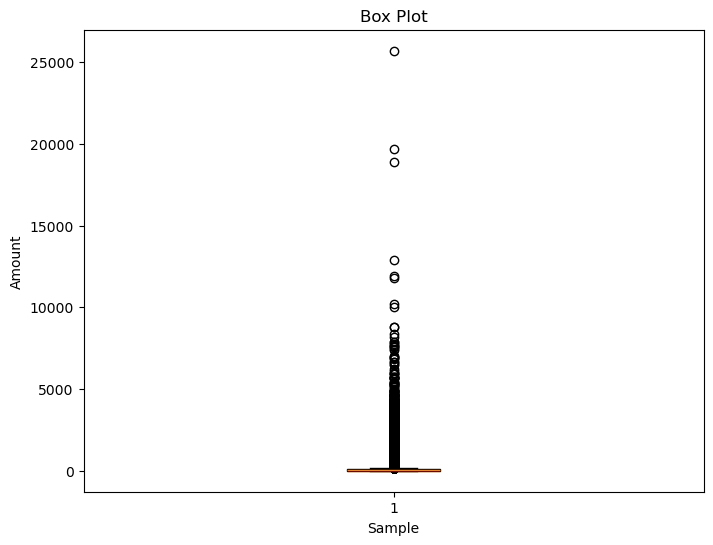

In [13]:
#Create a Box plot for Amount
plt.figure(figsize=(8,6))
plt.boxplot(df["Amount"],patch_artist=True)
plt.title("Box Plot")
plt.xlabel("Sample")
plt.ylabel("Amount")

In [14]:
df["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
df.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

(31.5, -0.5)

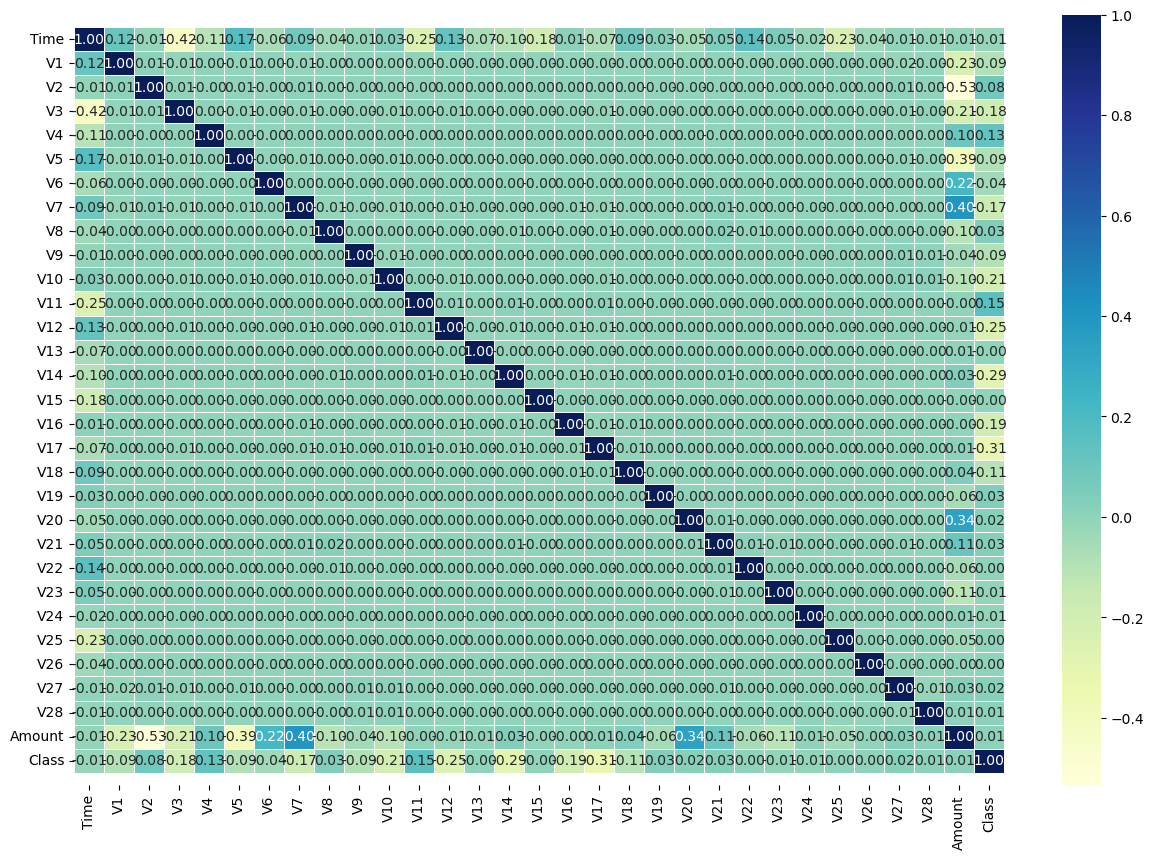

In [16]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 4. Modelling 

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Feature columns and target column
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = df['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `ROC_auc()`.

In [19]:
def fit_and_score_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score: {roc_auc}")
    
    # Plot ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

XGBoost Model Evaluation
Confusion Matrix:
 [[84965    11]
 [   35   107]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.75      0.82       142

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Precision: 0.9067796610169492, Recall: 0.7535211267605634, F1-Score: 0.823076923076923
ROC AUC Score: 0.8766958392228725


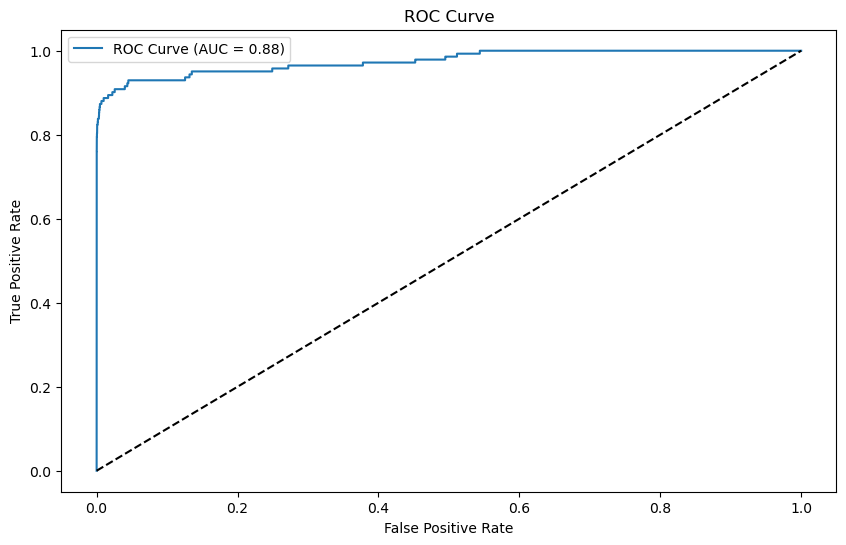

Random Forest Model Evaluation
Confusion Matrix:
 [[84972     4]
 [   41   101]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.71      0.82       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Precision: 0.9619047619047619, Recall: 0.7112676056338029, F1-Score: 0.8178137651821862
ROC AUC Score: 0.8556102667596618


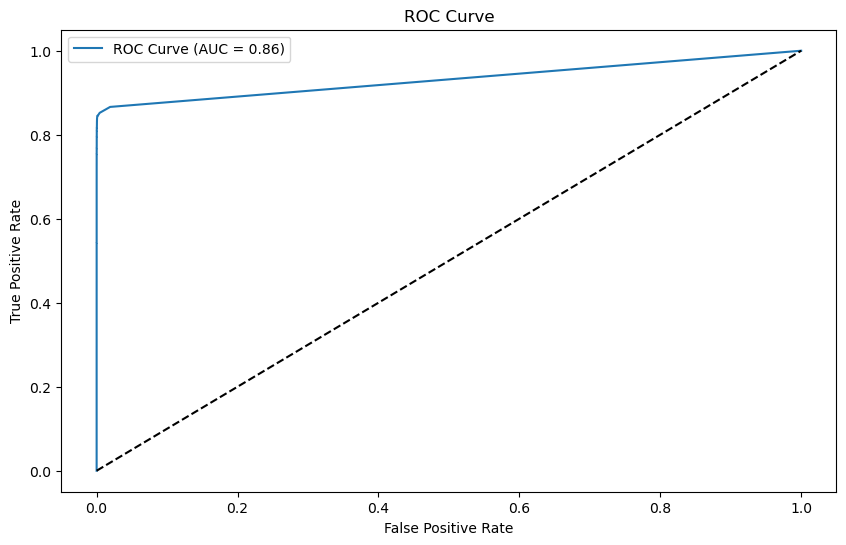

In [20]:
# Initialize models
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit and evaluate XGBoost
print("XGBoost Model Evaluation")
fit_and_score_model(xgb_model, X_train, y_train, X_test, y_test)

# Fit and evaluate Random Forest
print("Random Forest Model Evaluation")
fit_and_score_model(rf_model, X_train, y_train, X_test, y_test)

### Hyperparameter tuning (by hand)

Confusion Matrix:
 [[84959    17]
 [   36   106]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.86      0.75      0.80       142

    accuracy                           1.00     85118
   macro avg       0.93      0.87      0.90     85118
weighted avg       1.00      1.00      1.00     85118

Precision: 0.8617886178861789, Recall: 0.7464788732394366, F1-Score: 0.8
ROC AUC Score: 0.8731394083764495


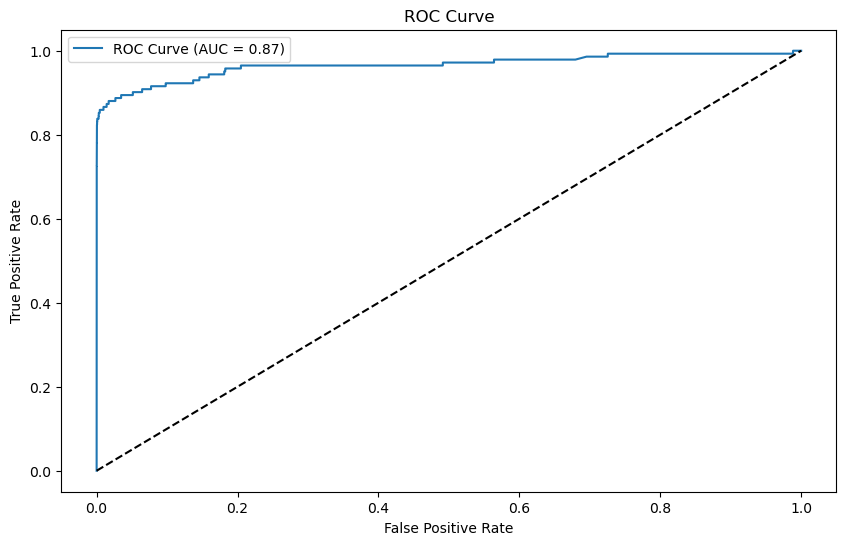

In [21]:
# Manual Hyperparameter tuning example for RandomForest
rf_model_manual = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
fit_and_score_model(rf_model_manual, X_train, y_train, X_test, y_test)

## Hyperparameter tuning with RandomizedSearchCV

C:\Users\mathe\OneDrive\Desktop\MyDailyWork\Titanic-Survival-Prediction\env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 16 candidates, totalling 32 fits


C:\Users\mathe\OneDrive\Desktop\MyDailyWork\Titanic-Survival-Prediction\env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Confusion Matrix:
 [[84960    16]
 [   36   106]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.75      0.80       142

    accuracy                           1.00     85118
   macro avg       0.93      0.87      0.90     85118
weighted avg       1.00      1.00      1.00     85118

Precision: 0.8688524590163934, Recall: 0.7464788732394366, F1-Score: 0.803030303030303
ROC AUC Score: 0.8731452923907594


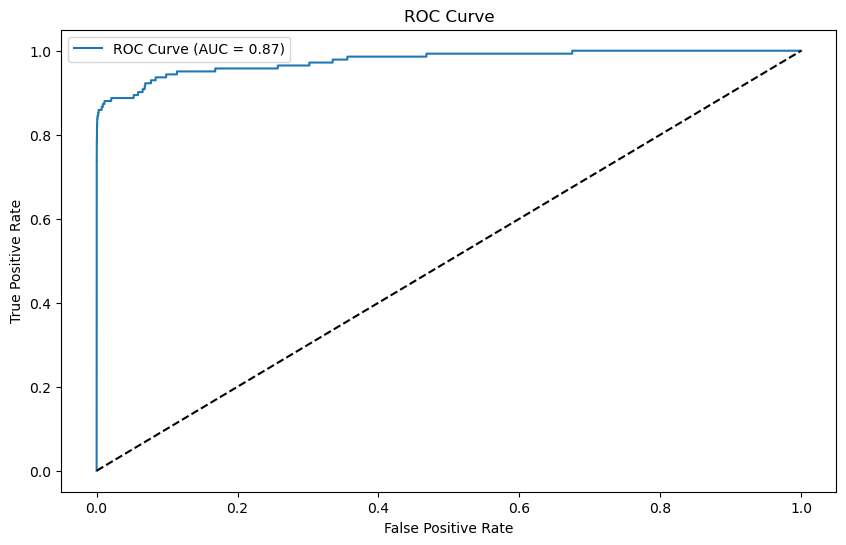

In [22]:
# Define hyperparameters to search
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True]
}

#Reduce the dataset size for tuning
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

# RandomizedSearchCV for RandomForest
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=2, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

#Fit on the Subset
rf_random.fit(X_train_sub, y_train_sub)

# Best parameters from RandomizedSearchCV
print(f"Best parameters found: {rf_random.best_params_}")

# Fit and evaluate the best model
best_rf_model = rf_random.best_estimator_
fit_and_score_model(best_rf_model, X_train, y_train, X_test, y_test)

## Hyperparamter Tuning with GridSearchCV

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
 [[84970     6]
 [   36   106]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.75      0.83       142

    accuracy                           1.00     85118
   macro avg       0.97      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Precision: 0.9464285714285714, Recall: 0.7464788732394366, F1-Score: 0.8346456692913385
ROC AUC Score: 0.8732041325338588


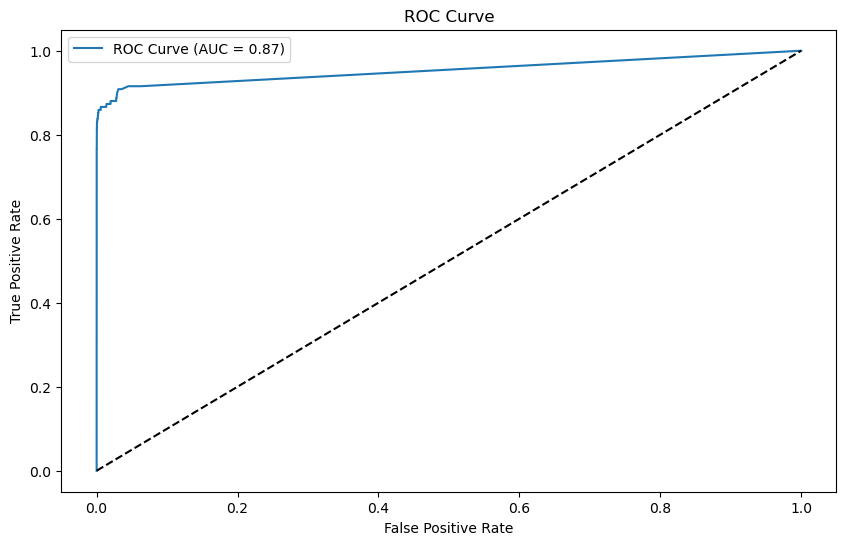

In [23]:
# Define hyperparameters grid
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True]
}

# GridSearchCV for RandomForest
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters found: {rf_grid.best_params_}")

# Fit and evaluate the best model
best_rf_grid_model = rf_grid.best_estimator_
fit_and_score_model(best_rf_grid_model, X_train, y_train, X_test, y_test)

### Feature Importance

In [25]:
# Fit an instance of LogisticRegression
clf = RandomForestClassifier(bootstrap= True, max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200, random_state=42)

clf.fit(X_train, y_train);

In [28]:
# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.009380492036021502
Feature 1: 0.01145102076964919
Feature 2: 0.009439646221228004
Feature 3: 0.017942198937351925
Feature 4: 0.02545409774656304
Feature 5: 0.011107980450262305
Feature 6: 0.010698404055012838
Feature 7: 0.023467055223091594
Feature 8: 0.011851056002067102
Feature 9: 0.03537227520725633
Feature 10: 0.08256197855310134
Feature 11: 0.04965282264846667
Feature 12: 0.13817517445479718
Feature 13: 0.007387675518887523
Feature 14: 0.1388614783562265
Feature 15: 0.008749603772432219
Feature 16: 0.08267667859793479
Feature 17: 0.18217981992075333
Feature 18: 0.03786472147345603
Feature 19: 0.0074032967310175045
Feature 20: 0.013106664537785957
Feature 21: 0.012878501688684395
Feature 22: 0.008530281190778722
Feature 23: 0.005907770148174241
Feature 24: 0.00691064544253999
Feature 25: 0.005507071712520954
Feature 26: 0.01772061503665052
Feature 27: 0.011483629510735838
Feature 28: 0.008605317606917328
Feature 29: 0.007672026449635203


In [33]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, clf.feature_importances_))
feature_dict

{'Time': 0.009380492036021502,
 'V1': 0.01145102076964919,
 'V2': 0.009439646221228004,
 'V3': 0.017942198937351925,
 'V4': 0.02545409774656304,
 'V5': 0.011107980450262305,
 'V6': 0.010698404055012838,
 'V7': 0.023467055223091594,
 'V8': 0.011851056002067102,
 'V9': 0.03537227520725633,
 'V10': 0.08256197855310134,
 'V11': 0.04965282264846667,
 'V12': 0.13817517445479718,
 'V13': 0.007387675518887523,
 'V14': 0.1388614783562265,
 'V15': 0.008749603772432219,
 'V16': 0.08267667859793479,
 'V17': 0.18217981992075333,
 'V18': 0.03786472147345603,
 'V19': 0.0074032967310175045,
 'V20': 0.013106664537785957,
 'V21': 0.012878501688684395,
 'V22': 0.008530281190778722,
 'V23': 0.005907770148174241,
 'V24': 0.00691064544253999,
 'V25': 0.005507071712520954,
 'V26': 0.01772061503665052,
 'V27': 0.011483629510735838,
 'V28': 0.008605317606917328,
 'Amount': 0.007672026449635203}

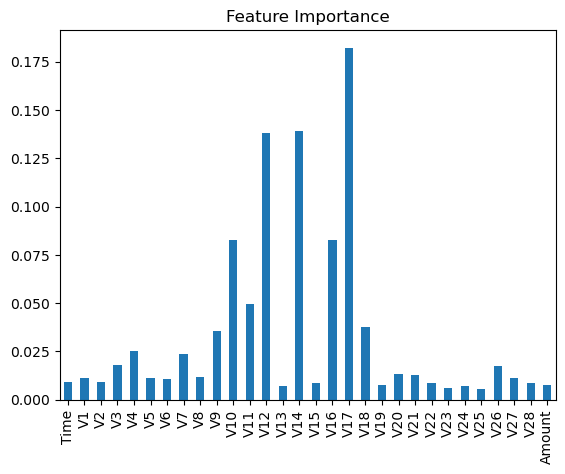

In [36]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 5. Saving and loading trained machine learning models

With Python's `pickle` module

**Pickle**

In [37]:
import pickle

# Save an extisting model to file
pickle.dump(clf, open("ccfd_logistic_regression_model_1.pkl", "wb"))

In [38]:
# Load a saved model
loaded_pickle_model = pickle.load(open("ccfd_logistic_regression_model_1.pkl", "rb"))

In [39]:
loaded_pickle_model.score(X_test,y_test)

0.9995535609389319

In [40]:
score = loaded_pickle_model.score(X_test,y_test)
print(f"Model Score: {score}")

Model Score: 0.9995535609389319
